<a href="https://colab.research.google.com/github/ulrikSebastienR/2021-Coding-Basic/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Implementation of 
#1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#2. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving clustering.csv to clustering.csv
User uploaded file "clustering.csv" with length 26276 bytes


In [ ]:
data = pd.read_csv("clustering.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,381.000000,381.000000,381.000000,370.000000,351.000000
mean,3579.845144,1277.275381,104.986877,340.864865,0.837607
std,1419.813818,2340.818114,28.358464,68.549257,0.369338
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2600.000000,0.000000,90.000000,360.000000,1.000000
50%,3333.000000,983.000000,110.000000,360.000000,1.000000
75%,4288.000000,2016.000000,127.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


In [ ]:
data["LoanAmount"]

0      128.0
1       66.0
2      120.0
3      141.0
4       95.0
       ...  
376    128.0
377    108.0
378     71.0
379     40.0
380    133.0
Name: LoanAmount, Length: 381, dtype: float64

In [ ]:
data["ApplicantIncome"]

0      4583
1      3000
2      2583
3      6000
4      2333
       ... 
376    5703
377    3232
378    2900
379    4106
380    4583
Name: ApplicantIncome, Length: 381, dtype: int64

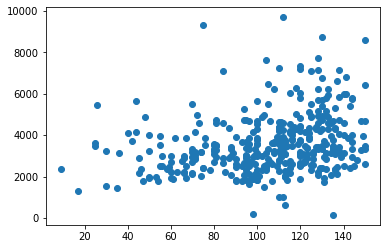

In [ ]:
plt.scatter(data["LoanAmount"],data["ApplicantIncome"])
plt.show()

<class 'pandas.core.frame.DataFrame'> (381, 2)      LoanAmount  ApplicantIncome
0         128.0             4583
1          66.0             3000
2         120.0             2583
3         141.0             6000
4          95.0             2333
..          ...              ...
376       128.0             5703
377       108.0             3232
378        71.0             2900
379        40.0             4106
380       133.0             4583

[381 rows x 2 columns]


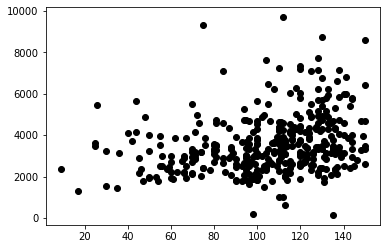

In [ ]:
df = data[["LoanAmount","ApplicantIncome"]]
print(type(df),df.shape, df)
  
plt.scatter(df["LoanAmount"],df["ApplicantIncome"],color="black")
plt.show()

In [ ]:
#Implementation of https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=0).fit(df)
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)


In [ ]:
print(type(kmeans.labels_),kmeans.labels_.shape,kmeans.labels_) #label of each point i.e. to which cluster does that point fall into

<class 'numpy.ndarray'> (381,) [0 1 1 2 1 1 1 1 1 0 0 0 0 1 2 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 2 2 1 0
 1 1 0 0 1 1 0 0 1 1 0 1 2 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 2 1
 2 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 2 1 1 1 1 1 2 0 1 1 1 0 0 0 1 0 1 1
 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 2 1 0 1 0 0 0 1 0 1 2 0 1 0 1 1 0 0 0
 2 1 2 0 2 2 2 1 1 0 1 2 0 0 1 2 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1
 2 0 0 1 1 1 0 1 0 0 1 1 1 1 2 0 0 1 0 1 0 1 0 0 1 0 1 1 2 0 1 1 1 1 1 2 1
 0 0 1 0 0 1 2 2 1 0 1 1 0 2 0 1 2 0 2 0 0 1 1 2 1 1 1 0 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 2 1 1 2 1 0 2 1 1 2 2 1 0 1 2 0 0 0 0 0 1 1 0 1 2 0 0 0 2 0
 0 2 1 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 2 0
 1 2 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 2 1 0 2 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 2 1 1 0 0]


In [ ]:
print(kmeans.cluster_centers_,"\n", kmeans.inertia_,"\n", kmeans.n_iter_)

[[ 109.94193548 4038.50322581]
 [  97.38251366 2502.20765027]
 [ 119.48837209 6512.76744186]] 
 151292976.5689429 
 5


In [ ]:
#Now direct programming without sklearn
#2. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
K = 3 #Initializing randomly number of centroids to be 3
Centroids = df.sample(n=K)
print(df.sample(n=K))

     LoanAmount  ApplicantIncome
138       144.0             2971
308        80.0             3547
81         93.0             3692


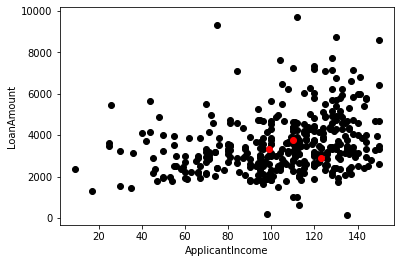

In [ ]:
plt.scatter(df["LoanAmount"],df["ApplicantIncome"],color="black")
plt.scatter(Centroids["LoanAmount"],Centroids["ApplicantIncome"],color="red")
plt.xlabel("ApplicantIncome")
plt.ylabel("LoanAmount")
plt.show()

In [ ]:
diff = 1
j = 0
